In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import re
import string
import joblib

In [2]:
movies1 = pd.read_csv("C:\\Users\\ashri\\CPSC 8740\\IMDB Dataset\\archive\\IMDb_Dataset.csv")
movies2 = pd.read_csv("C:\\Users\\ashri\\CPSC 8740\\IMDB Dataset\\archive\\IMDb_Dataset_2.csv")
movies3 = pd.read_csv("C:\\Users\\ashri\\CPSC 8740\\IMDB Dataset\\archive\\IMDb_Dataset_3.csv")
movies = pd.concat([movies1, movies2, movies3], ignore_index = True)

In [3]:
print(movies2.head())

                          Title  IMDb Rating  Year Certificates        Genre  \
0              End of the Spear          6.8  2005        PG-13    Adventure   
1                Elvira Madigan          7.0  1967           PG    Biography   
2  The Kid Stays in the Picture          7.3  2002            R  Documentary   
3                 It Ain't Over          8.2  2022           PG  Documentary   
4                        Mahler          7.0  1974           PG    Biography   

           Director                                   Star Cast  MetaScore  \
0         Jim Hanon         Louie LeonardoChad AllenJack Guzman       45.0   
1      Bo Widerberg  Pia DegermarkThommy BerggrenLennart Malmer       66.0   
2  Nanette Burstein          Robert EvansEddie AlbertPeter Bart       75.0   
3       Sean Mullin          Andy AndresRoger AngellMarty Appel       79.0   
4       Ken Russell      Robert PowellGeorgina HaleLee Montague       66.0   

                                          Poster-s

In [4]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4573 entries, 0 to 4572
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               4573 non-null   object 
 1   IMDb Rating         4573 non-null   float64
 2   Year                4573 non-null   int64  
 3   Certificates        4573 non-null   object 
 4   Genre               4573 non-null   object 
 5   Director            4573 non-null   object 
 6   Star Cast           4573 non-null   object 
 7   MetaScore           4573 non-null   float64
 8   Duration (minutes)  4573 non-null   float64
 9   Poster-src          4173 non-null   object 
 10  Second_Genre        1000 non-null   object 
 11  Third_Genre         1000 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 428.8+ KB
None


In [5]:
print(movies.describe())

       IMDb Rating         Year    MetaScore  Duration (minutes)
count  4573.000000  4573.000000  4573.000000         4573.000000
mean      6.834660  2005.460529    64.122589          112.749421
std       0.878024    17.263552    13.169511           22.092234
min       3.900000  1917.000000    11.000000           46.000000
25%       6.300000  1997.000000    57.100000           99.000000
50%       6.900000  2010.000000    66.000000          115.000000
75%       7.400000  2018.000000    69.000000          119.000000
max       9.500000  2025.000000   100.000000          317.000000


In [6]:
print(movies.isnull().sum())

Title                    0
IMDb Rating              0
Year                     0
Certificates             0
Genre                    0
Director                 0
Star Cast                0
MetaScore                0
Duration (minutes)       0
Poster-src             400
Second_Genre          3573
Third_Genre           3573
dtype: int64


In [7]:
def separate_no_precheck(cast_string):
    if pd.isna(cast_string):
        return ""
    cast_string = str(cast_string).strip()

    pattern = r"([a-z0-9])([A-Z])"
    separated_string = re.sub(pattern, r"\1, \2", cast_string, flags=re.UNICODE)

    return separated_string

movies['Star Cast'] = movies['Star Cast'].apply(separate_no_precheck)
movies['Star Cast Lower'] = movies['Star Cast'].str.lower()
movies['Star Cast List'] = movies['Star Cast Lower'].apply(lambda x: x.split(', '))
movies['Star Cast List Clean'] = movies['Star Cast List'].apply(lambda name_list: [name.strip() for name in name_list])
print(movies[['Star Cast', 'Star Cast Lower', 'Star Cast List Clean']].head())

                                       Star Cast  \
0  David Franzoni, John Logan, William Nicholson   
1         Tom Cruise, Hayley Atwell, Ving Rhames   
2        Zack Snyder, Kurt Johnstad, Shay Hatten   
3              Brad Pitt, Diane Kruger, Eli Roth   
4                          Eli Roth, Joe Crombie   

                                 Star Cast Lower  \
0  david franzoni, john logan, william nicholson   
1         tom cruise, hayley atwell, ving rhames   
2        zack snyder, kurt johnstad, shay hatten   
3              brad pitt, diane kruger, eli roth   
4                          eli roth, joe crombie   

                              Star Cast List Clean  
0  [david franzoni, john logan, william nicholson]  
1         [tom cruise, hayley atwell, ving rhames]  
2        [zack snyder, kurt johnstad, shay hatten]  
3              [brad pitt, diane kruger, eli roth]  
4                          [eli roth, joe crombie]  


In [8]:
print(movies['Genre'].unique())

['Action' 'Adventure' 'Animation' 'Crime' 'Comedy' 'Biography' 'Horror'
 'Drama' 'Fantasy' 'Thriller' 'Documentary' 'Family' 'Sci-Fi' 'Musical'
 'Mystery' 'Romance' 'History' 'Reality-TV']


In [9]:
#Fill NaN with empty strings to avoid errors during concatenation
movies['Second_Genre'] = movies['Second_Genre'].fillna('')
movies['Third_Genre'] = movies['Third_Genre'].fillna('')

#Combine Genres into a list
movies['Genres'] = movies.apply(lambda row: [g for g in [row['Genre'], row['Second_Genre'], row['Third_Genre']] if g != ''], axis=1)

#One-Hot Encode the combinded Genres
movies['Genres_str'] = movies['Genres'].apply(lambda x: ', '.join(x))
genre_dummies = movies['Genres_str'].str.get_dummies(sep=', ')
movies = pd.concat([movies, genre_dummies], axis = 1)
movies.drop(['Genres_str', 'Genre', 'Second_Genre', 'Third_Genre'], axis=1, inplace=True)
movies.drop(['Poster-src'], axis = 1, inplace = True)

print(movies.head())

                                           Title  IMDb Rating  Year  \
0                                      Gladiator          8.5  2000   
1  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
2           Rebel Moon - Part Two: The Scargiver          5.2  2024   
3                           Inglourious Basterds          8.4  2009   
4                                    Borderlands          7.1  2024   

  Certificates               Director  \
0            R           Ridley Scott   
1        PG-13  Christopher McQuarrie   
2        PG-13            Zack Snyder   
3            R      Quentin Tarantino   
4            R               Eli Roth   

                                       Star Cast  MetaScore  \
0  David Franzoni, John Logan, William Nicholson       67.0   
1         Tom Cruise, Hayley Atwell, Ving Rhames       81.0   
2        Zack Snyder, Kurt Johnstad, Shay Hatten       35.0   
3              Brad Pitt, Diane Kruger, Eli Roth       69.0   
4          

In [10]:
print(movies['Certificates'].unique())

['R' 'PG-13' 'PG' 'TV-G' 'G' 'Not Rated' 'Approved' 'TV-MA' 'NC-17' '16+'
 'TV-PG' 'M/PG' 'Unrated' 'TV-Y7' 'TV-14' 'X' 'Passed' 'TV-Y7-FV']


In [11]:
def clean_title(title):
    return re.sub(r'\d+', '', title)

#Using Regular Expressions to remove any numbers in the title. 

movies['Title']=movies['Title'].apply(clean_title)

In [12]:
# Converting to lowercase for consistency 
text_columns = ['Title', 'Director']
for col in text_columns:
    movies[col] = movies[col].str.lower()

In [13]:
#Feature scaling to have mean of 0 and std deviation of 1. Normalization will be helpful for gradient descent in the Neural Network.
scaler = StandardScaler()
numerical_cols = ['IMDb Rating', 'Duration (minutes)', 'Year']
movies[numerical_cols] = scaler.fit_transform(movies[numerical_cols])
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [14]:
#Min-Max Scaling to scale data between range of 0-1. Useful to preserve original distribution. 
min_max_scaler = MinMaxScaler()
movies[numerical_cols] = min_max_scaler.fit_transform(movies[numerical_cols])
joblib.dump(min_max_scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

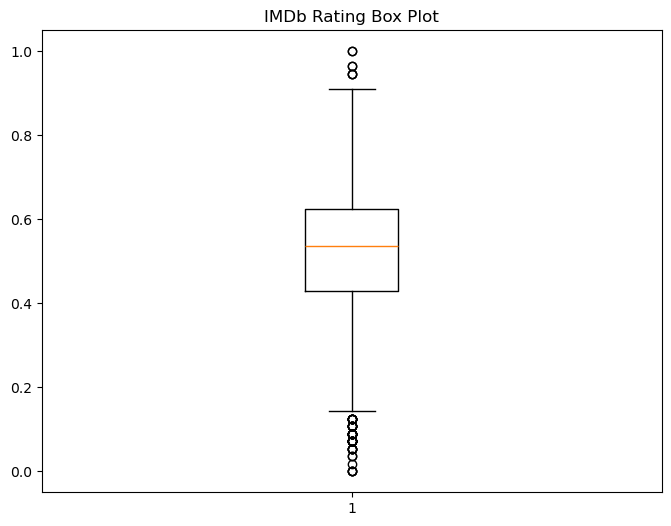

In [15]:
#Using Matplotlib to visualize outliers.
plt.figure(figsize = (8,6))
plt.boxplot(movies['IMDb Rating'].dropna()) #Drop NaN if needed
plt.title('IMDb Rating Box Plot')
plt.show()

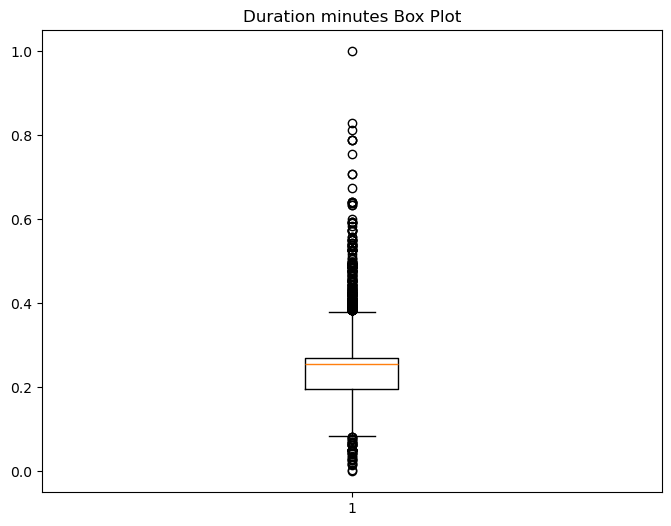

In [16]:
plt.figure(figsize = (8,6))
plt.boxplot(movies['Duration (minutes)'].dropna()) #Drop NaN if needed
plt.title('Duration minutes Box Plot')
plt.show()

In [17]:
# Remove Outliers using the IQR method for if they lay further than Q1 - 1.5*IQR or Q3 + 1.5*IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data
movies = remove_outliers_iqr(movies, 'IMDb Rating')
movies = remove_outliers_iqr(movies, 'Duration (minutes)')

In [18]:
#Dropping MetaScore
movies = movies.drop(['MetaScore'], axis = 1)

In [19]:
print(movies.head())

                                  Title  IMDb Rating      Year Certificates  \
2  rebel moon - part two: the scargiver     0.232143  0.990741        PG-13   
4                           borderlands     0.571429  0.990741            R   
5                         jurassic park     0.767857  0.703704        PG-13   
6                     the fifth element     0.660714  0.740741        PG-13   
7                            inside out     0.750000  0.907407           PG   

           Director                                      Star Cast  \
2       zack snyder        Zack Snyder, Kurt Johnstad, Shay Hatten   
4          eli roth                          Eli Roth, Joe Crombie   
5  steven spielberg                  Michael Crichton, David Koepp   
6        luc besson                  Luc Besson, Robert Mark Kamen   
7       pete docter  Pete Docter, Ronnie Del Carmen, Meg Le, Fauve   

   Duration (minutes)                                Star Cast Lower  \
2            0.280443        zac

In [20]:
#saving preprocessed data
movies.to_csv('preprocessed_movies.csv', index=False)

In [25]:
genre_column_count = len(genre_dummies.columns)

In [28]:
print(f"Number of unique genres {genre_column_count}")

Number of unique genres 21


In [29]:
print(movies.columns)

Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Director', 'Star Cast',
       'Duration (minutes)', 'Star Cast Lower', 'Star Cast List',
       'Star Cast List Clean', 'Genres', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Western'],
      dtype='object')
